In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
iris_dataset = pd.read_csv('/content/drive/My Drive/CA683/iris_data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
iris_dataset.isna().sum()

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [ ]:
iris_dataset[iris_dataset['Sepal.Width'].isna()]['Species']

12    setosa
Name: Species, dtype: object

In [ ]:
iris_dataset[iris_dataset['Petal.Length'].isna()]['Species']

12    setosa
Name: Species, dtype: object

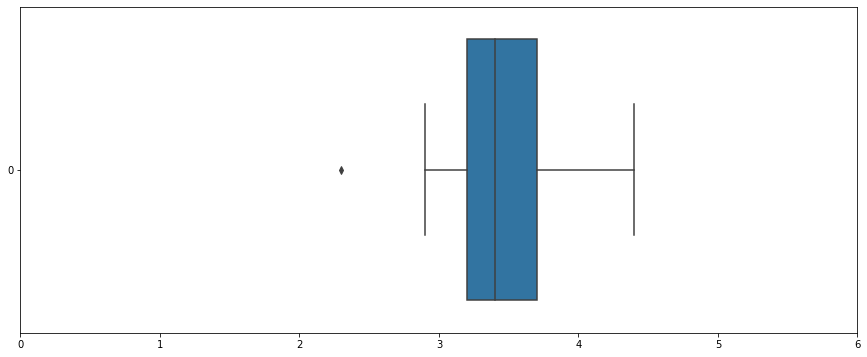

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
a = fig.gca()
a.set(xlim=(0,6))
import seaborn as sb
sb.boxplot(data=iris_dataset.loc[iris_dataset['Species'] == 'setosa']['Sepal.Width'], ax =a, orient='h')

In [ ]:
median_len = iris_dataset.loc[iris_dataset['Species'] == 'setosa']['Sepal.Width'].median()
m_value = {"Sepal.Width": median_len}
iris_dataset.fillna(value = m_value, inplace = True)  #TODO Check condition for species setosa

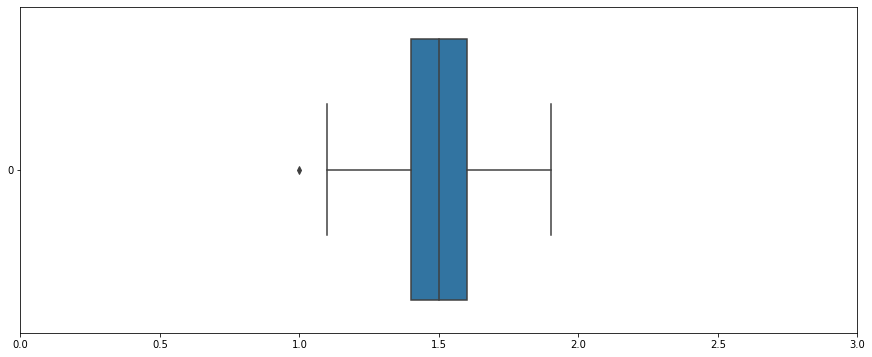

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
a = fig.gca()
a.set(xlim=(0,3))
import seaborn as sb
sb.boxplot(data=iris_dataset.loc[iris_dataset['Species'] == 'setosa']['Petal.Length'], ax =a, orient='h')

In [ ]:
mean_len = iris_dataset.loc[iris_dataset['Species'] == 'setosa']['Petal.Length'].mean()
m_value = {"Petal.Length": mean_len}
iris_dataset.fillna(value = m_value, inplace = True)  #TODO Check condition for species setosa

In [ ]:
iris_dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,9.407333,3.060000,3.758422,1.199333
std,43.621311,0.436736,1.764739,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,540.000000,4.400000,6.900000,2.500000


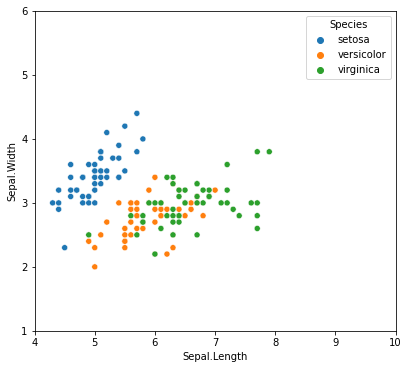

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
scatter_plot_fig = plt.figure(figsize=(22,20))
a = scatter_plot_fig.add_subplot(331)
a.set(xlim=(4,10), ylim=(1,6))
sb.scatterplot(x=iris_dataset['Sepal.Length'],y=iris_dataset['Sepal.Width'],hue=iris_dataset['Species'],ax=a)

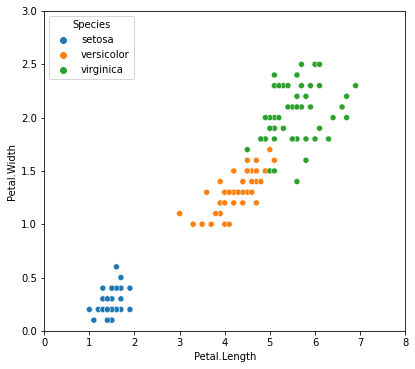

In [ ]:
scatter_plot_figg = plt.figure(figsize=(22,20))
b = scatter_plot_figg.add_subplot(331)
b.set(xlim=(0,8), ylim=(0,3))
sb.scatterplot(x=iris_dataset['Petal.Length'], y=iris_dataset['Petal.Width'], hue=iris_dataset['Species'], ax=b)

Corelation Matrix

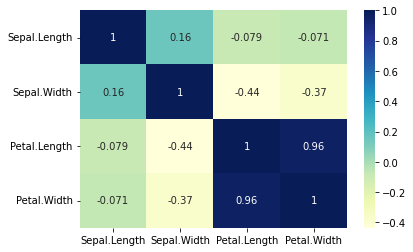

In [ ]:
sb.heatmap(iris_dataset.corr(),cmap='YlGnBu', annot=True)

Add Numberic mapping for the Species -> Categorical to Numerical

In [ ]:
def categ_to_num(species):
  if species=='setosa':
    return 1
  elif species=='versicolor':
    return 2
  else:
    return 3

iris_dataset['Species.Mapping'] = iris_dataset['Species'].apply(categ_to_num)

Split data into training and testing dataset

In [ ]:
X = iris_dataset.copy()
X = X.drop(columns="Species")
y = X.pop('Species.Mapping')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

Standardize , To keep the the proportional relations between X values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# iris_dataset['Species.Mapping'].value_counts(normalize= True)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', C=7.0 ,multi_class='multinomial')
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
# clf.fit(X_train, y_train)
model.fit(X_train, y_train)
model.score(X_test, y_test)
#clf.score(X_test, y_test)

#from sklearn import tree
#tree.plot_tree(clf)

0.9666666666666667

Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=8, scoring='accuracy')
import numpy as np
print(np.mean(scores))

0.95


Predection

Classification Report: 
               precision    recall  f1-score   support

           4       1.00      0.90      0.95        10
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



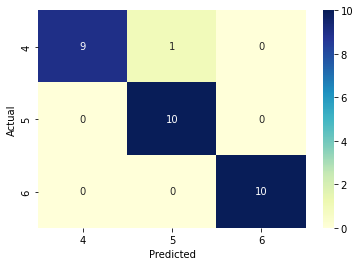

In [ ]:
from sklearn.metrics import classification_report
y_predict_vif = model.predict(X_test)
conf_p_vif = pd.crosstab(y_test,y_predict_vif, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(conf_p_vif, cmap='YlGnBu', annot=True)
report_vif = classification_report(y_test, y_predict_vif)
print("Classification Report: \n", report_vif)